In [1]:
#Basic Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# #ML Library
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier   #randomforest_library
from sklearn.datasets import make_classification

from sklearn.preprocessing import StandardScaler    #kneighbour_library
from sklearn.neighbors import KNeighborsClassifier


In [2]:
df = pd.read_csv("Asthma.csv")

In [3]:
df.tail()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
2387,7421,43,1,0,2,29.059613,0,3.019854,6.119637,8.300960,...,0,3.125249,5.166032,0,1,0,0,0,1,1
2388,7422,18,1,0,1,20.740850,0,5.805180,4.386992,7.731192,...,0,1.132977,5.509502,0,0,0,1,1,0,1
2389,7423,54,0,3,2,37.079560,0,4.735169,8.214064,7.483521,...,0,1.685962,3.346877,1,0,1,1,0,1,1
2390,7424,46,1,0,2,23.444712,0,9.672637,7.362861,6.717272,...,1,3.481549,1.713274,0,1,1,0,1,1,0
2391,7425,26,1,0,0,28.123021,1,1.613138,7.412878,8.512253,...,0,2.280613,2.453284,1,1,0,0,1,0,0


In [4]:
df.shape

(2392, 28)

In [5]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'PollutionExposure', 'PollenExposure', 'DustExposure', 'PetAllergy',
       'FamilyHistoryAsthma', 'HistoryOfAllergies', 'Eczema', 'HayFever',
       'GastroesophagealReflux', 'LungFunctionFEV1', 'LungFunctionFVC',
       'Wheezing', 'ShortnessOfBreath', 'ChestTightness', 'Coughing',
       'NighttimeSymptoms', 'ExerciseInduced', 'Diagnosis'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2392 non-null   int64  
 1   Age                     2392 non-null   int64  
 2   Gender                  2392 non-null   int64  
 3   Ethnicity               2392 non-null   int64  
 4   EducationLevel          2392 non-null   int64  
 5   BMI                     2392 non-null   float64
 6   Smoking                 2392 non-null   int64  
 7   PhysicalActivity        2392 non-null   float64
 8   DietQuality             2392 non-null   float64
 9   SleepQuality            2392 non-null   float64
 10  PollutionExposure       2392 non-null   float64
 11  PollenExposure          2392 non-null   float64
 12  DustExposure            2392 non-null   float64
 13  PetAllergy              2392 non-null   int64  
 14  FamilyHistoryAsthma     2392 non-null   

In [7]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,0,1.369051,4.941206,0,0,1,0,0,1,0
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,0,2.197767,1.702393,1,0,0,1,1,1,0
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,0,1.698011,5.022553,1,1,1,0,1,1,0
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,0,3.032037,2.300159,1,0,1,1,1,0,0
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,0,3.470589,3.067944,1,1,1,0,0,1,0


In [8]:
# Step 4: Define your target column (y) and drop it from the DataFrame to get features (X)
target_column = 'Diagnosis'  # target column name
y = df[target_column]
X = df.drop(columns=[target_column])

In [9]:
# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
## Decision_Tree

# Step 6: Train a Decision Tree classifier on the training data
dtclf = DecisionTreeClassifier(random_state=42)
dtclf.fit(X_train, y_train)

# Step 7: Evaluate the classifier on the testing data
y_pred = dtclf.predict(X_test)
# print(y_pred)

# Step 8: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.94


In [11]:
##Random_Tree

# Step 6: Train a Random Tree classifier on the training data
rfclf = RandomForestClassifier(max_depth=2, random_state=42)
rfclf.fit(X_train, y_train)

# Step 7: Evaluate the classifier on the testing data
y_pred = rfclf.predict(X_test)
# print(y_pred)

# Step 8: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.95


In [12]:
## KNN

# Step 6: Train a K Nearest Neighbour classifier on the training data
k = 5
knnclf = KNeighborsClassifier(n_neighbors=k)
knnclf.fit(X_train, y_train)

# Step 7: Evaluate the classifier on the testing data
y_pred = knnclf.predict(X_test)
# print(y_pred)

# Step 8: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.95


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       456
           1       0.47      0.39      0.43        23

    accuracy                           0.95       479
   macro avg       0.72      0.68      0.70       479
weighted avg       0.95      0.95      0.95       479



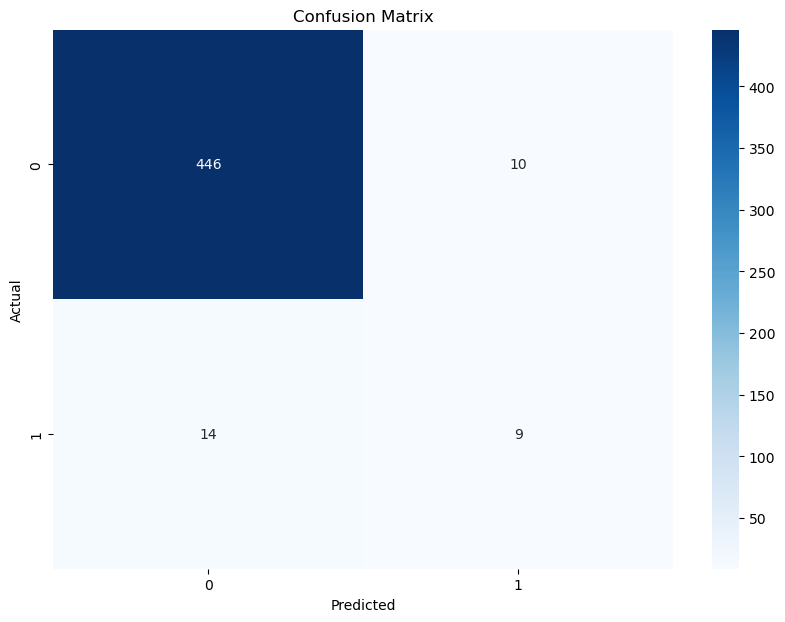

In [13]:
# Step 9: Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 10a: Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 10b: Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dtclf.classes_, yticklabels=dtclf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

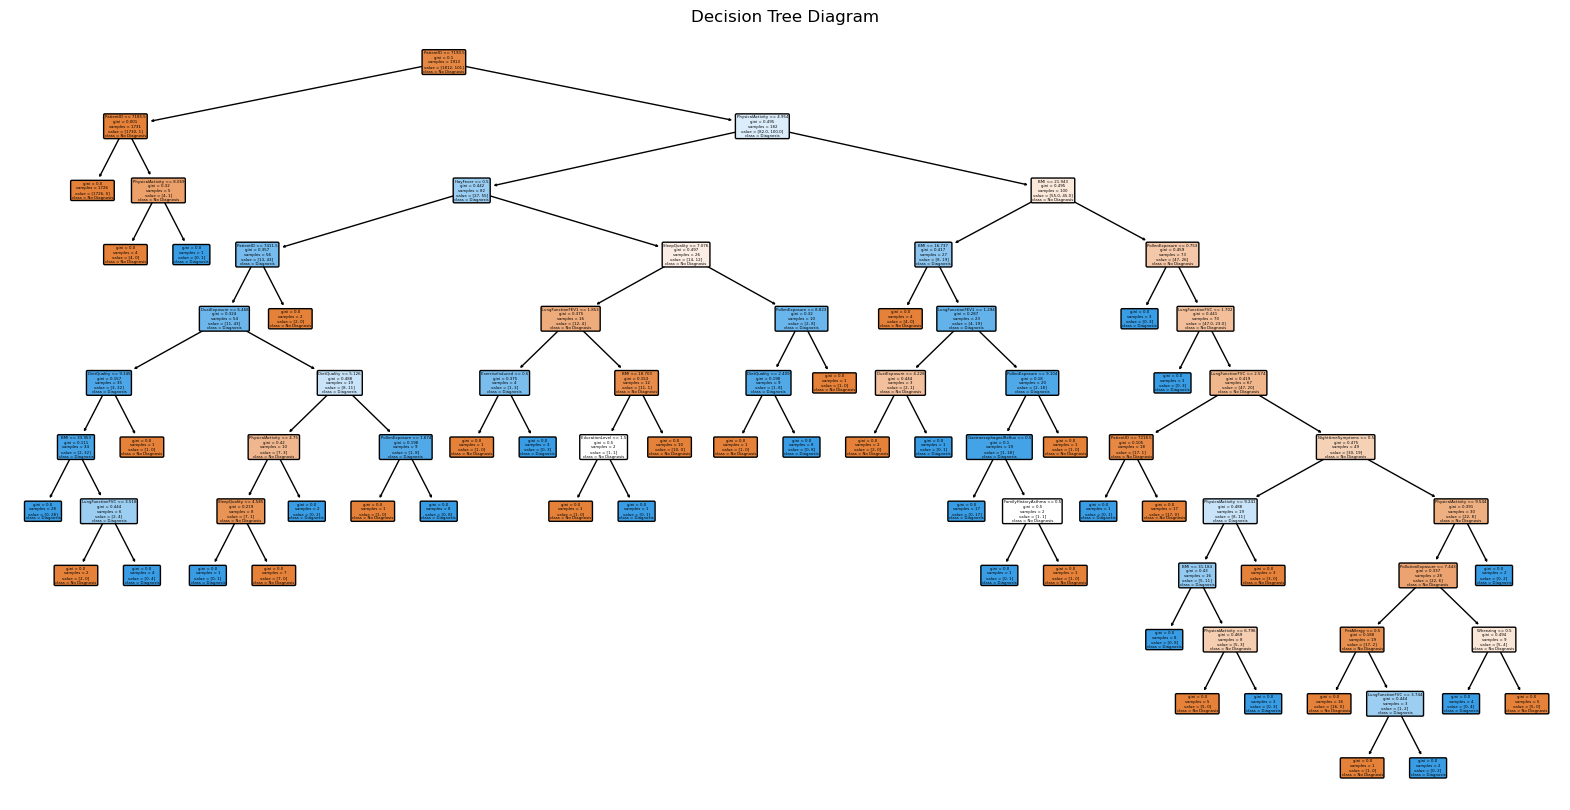

In [18]:
# # Step 11: Plot the Decision Tree diagram
plt.figure(figsize=(20, 10))
plot_tree(dtclf, feature_names=X.columns, class_names=['No Diagnosis', 'Diagnosis'], filled=True, rounded=True)
plt.title('Decision Tree Diagram')
plt.show()

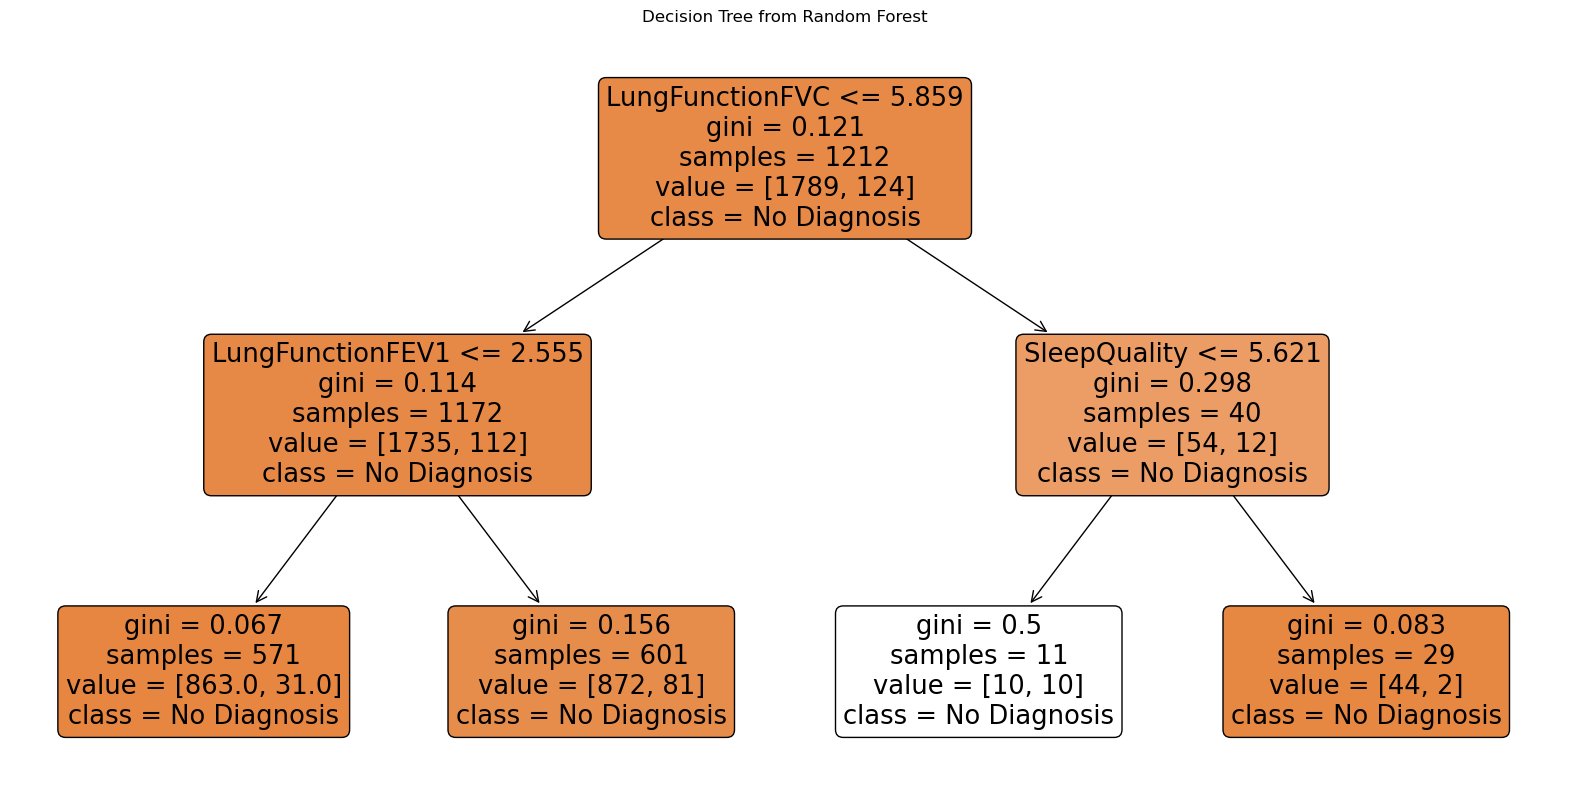

In [20]:
# Plot one of the trees from the Random Forest
# Here we plot the first tree (estimator) in the forest
plt.figure(figsize=(20, 10))
plot_tree(rfclf.estimators_[0], feature_names=X.columns, class_names=['No Diagnosis', 'Diagnosis'], filled=True, rounded=True)
plt.title('Decision Tree from Random Forest')
plt.show()